<a href="https://colab.research.google.com/github/strna8-cloud/healthcare-purchase-prediction/blob/main/%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q kaggle
from google.colab import files
files.upload()  # 여기서 kaggle.json 선택

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gabhan","key":"4d1d782b288bacdbb2be1ae01d47fb4a"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
# UCI 온라인 쇼퍼 구매의도 데이터셋 (타깃: Revenue)
!kaggle datasets download -d imakash3011/online-shoppers-purchasing-intention-dataset
!unzip -o online-shoppers-purchasing-intention-dataset.zip


Dataset URL: https://www.kaggle.com/datasets/imakash3011/online-shoppers-purchasing-intention-dataset
License(s): other
  0% 0.00/252k [00:00<?, ?B/s]
100% 252k/252k [00:00<00:00, 484MB/s]
Archive:  online-shoppers-purchasing-intention-dataset.zip
  inflating: online_shoppers_intention.csv  


In [6]:
import pandas as pd
df = pd.read_csv("online_shoppers_intention.csv")  # 파일명이 다르면 !ls 로 확인
print("shape:", df.shape)
df.head()


shape: (12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [7]:
# 데이터 크기와 결측치 확인
print("Shape:", df.shape)
print("\n결측치 개수:")
print(df.isnull().sum())

# 데이터 타입 및 요약
print("\n데이터 타입 확인:")
print(df.dtypes)

# 기본 통계량
df.describe()


Shape: (12330, 18)

결측치 개수:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

데이터 타입 확인:
Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Brows

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lo

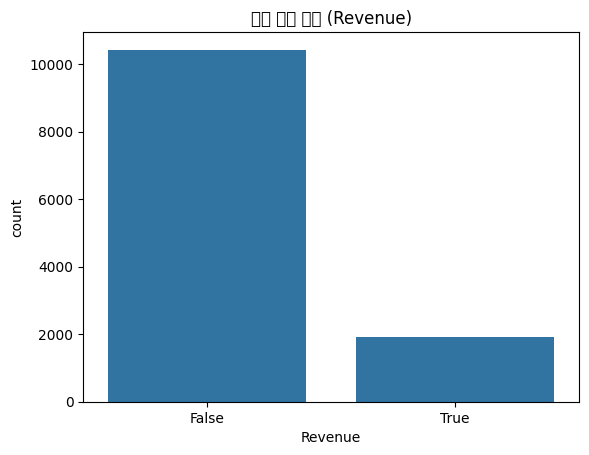

Revenue
False    0.845255
True     0.154745
Name: proportion, dtype: float64


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Revenue", data=df)
plt.title("구매 여부 분포 (Revenue)")
plt.show()

print(df["Revenue"].value_counts(normalize=True))


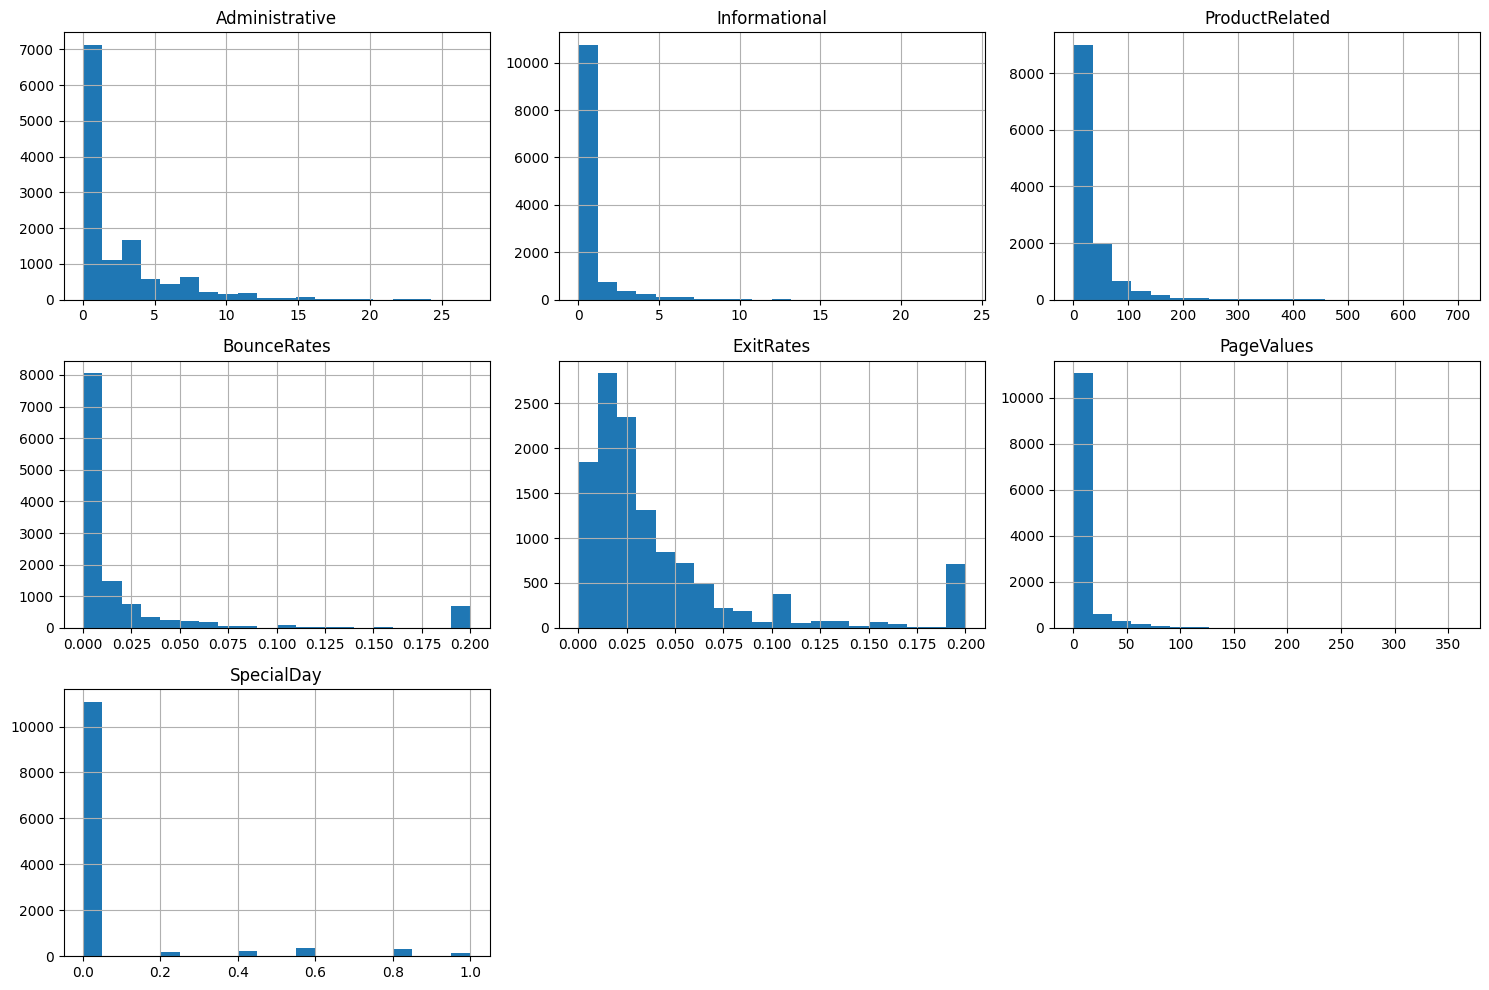

In [9]:
num_cols = ["Administrative", "Informational", "ProductRelated",
            "BounceRates", "ExitRates", "PageValues", "SpecialDay"]

df[num_cols].hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


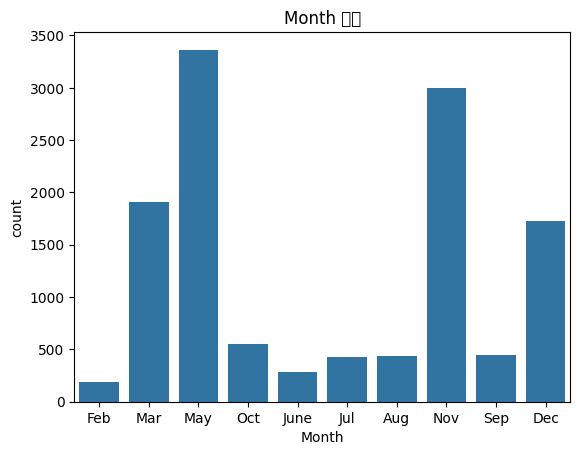

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


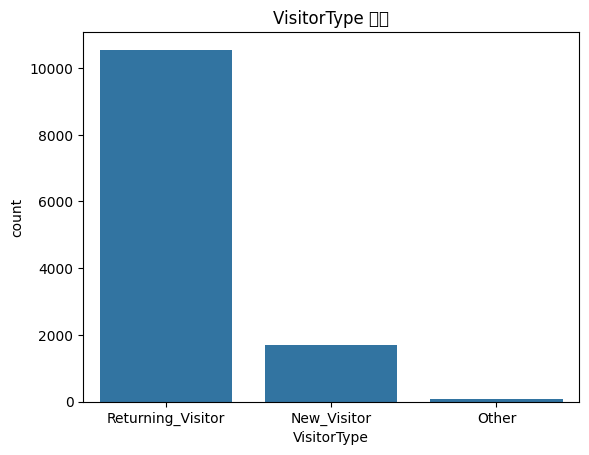

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


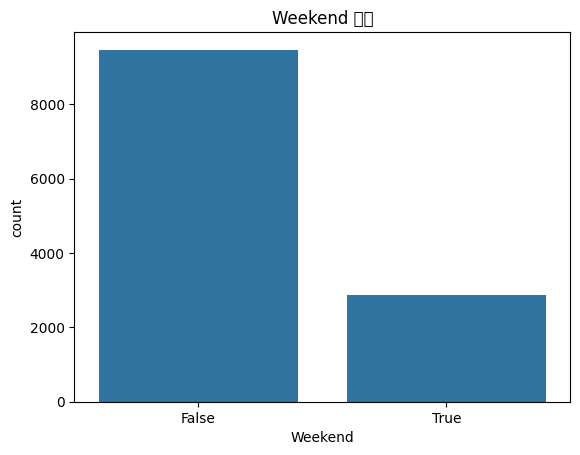

In [10]:
cat_cols = ["Month", "VisitorType", "Weekend"]

for col in cat_cols:
    sns.countplot(x=col, data=df)
    plt.title(f"{col} 분포")
    plt.show()


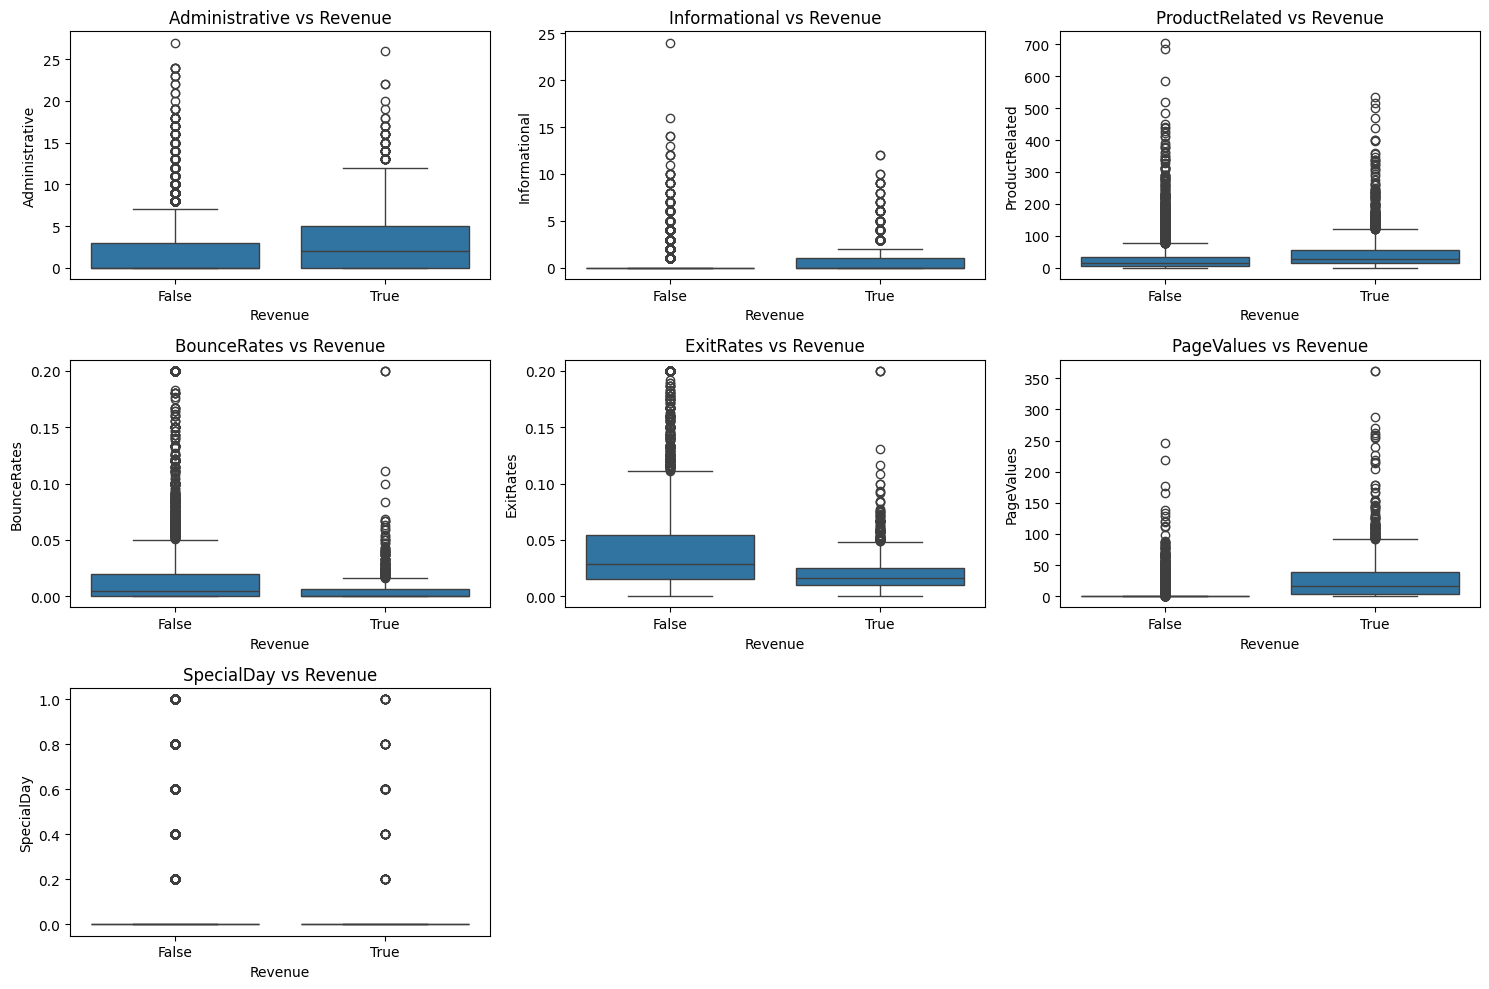

In [11]:
num_cols = ["Administrative", "Informational", "ProductRelated",
            "BounceRates", "ExitRates", "PageValues", "SpecialDay"]

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3,3,i)
    sns.boxplot(x="Revenue", y=col, data=df)
    plt.title(f"{col} vs Revenue")
plt.tight_layout()
plt.show()


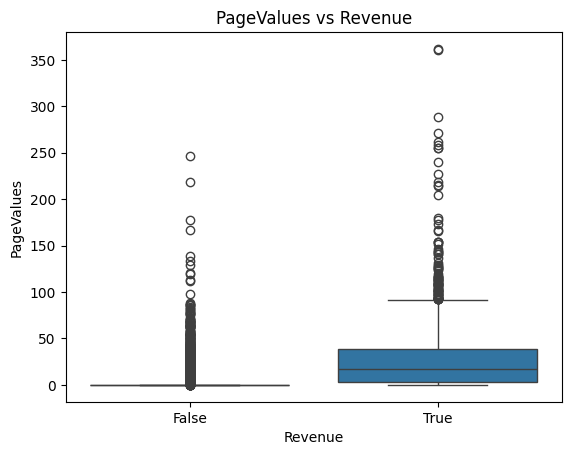

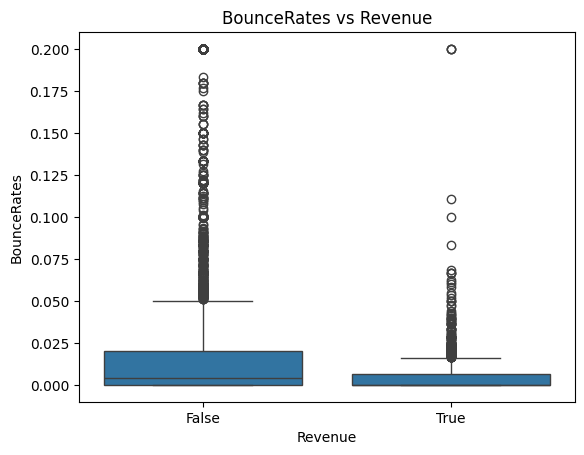

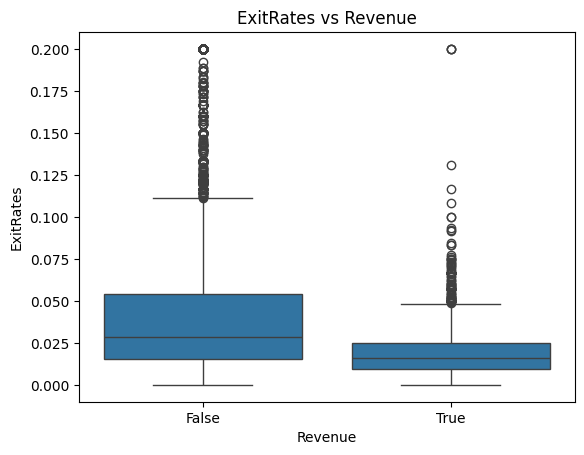

In [12]:
sns.boxplot(x="Revenue", y="PageValues", data=df)
plt.title("PageValues vs Revenue")
plt.show()

sns.boxplot(x="Revenue", y="BounceRates", data=df)
plt.title("BounceRates vs Revenue")
plt.show()

sns.boxplot(x="Revenue", y="ExitRates", data=df)
plt.title("ExitRates vs Revenue")
plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Feature(X), Target(y) 분리
X = df.drop("Revenue", axis=1)
y = df["Revenue"]

# 범주형 변수 원-핫 인코딩 (문자를 숫자로 변환)
X = pd.get_dummies(X, drop_first=True)

# Train/Test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8884833738848338

Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.97      0.94      2055
        True       0.75      0.50      0.60       411

    accuracy                           0.89      2466
   macro avg       0.83      0.73      0.77      2466
weighted avg       0.88      0.89      0.88      2466


Confusion Matrix:
 [[1987   68]
 [ 207  204]]


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 랜덤포레스트 모델 정의 & 학습
rf_model = RandomForestClassifier(
    n_estimators=100,     # 트리 개수
    max_depth=10,        # 트리 깊이 제한
    class_weight="balanced",  # 불균형 데이터 보정
    random_state=42
)

rf_model.fit(X_train, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test)

# 평가
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Accuracy: 0.8811841038118411

Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.90      0.93      2055
        True       0.61      0.78      0.69       411

    accuracy                           0.88      2466
   macro avg       0.78      0.84      0.81      2466
weighted avg       0.90      0.88      0.89      2466


Confusion Matrix:
 [[1851  204]
 [  89  322]]


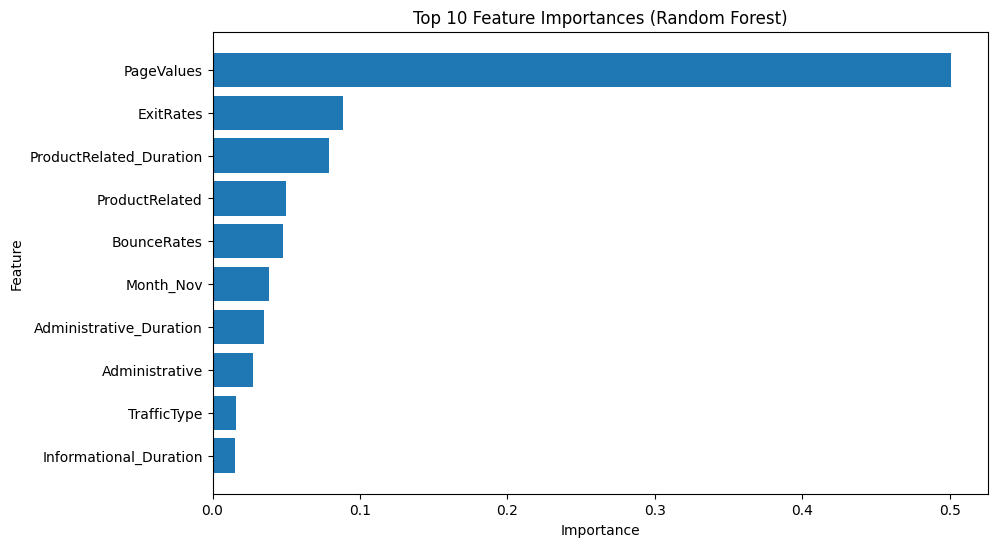

,Feature,Importance
8,PageValues,0.500592
7,ExitRates,0.088474
5,ProductRelated_Duration,0.078787
4,ProductRelated,0.049991
6,BounceRates,0.048067
21,Month_Nov,0.038492
1,Administrative_Duration,0.034813
0,Administrative,0.027400
13,TrafficType,0.015881
3,Informational_Duration,0.014994


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 변수 중요도 추출
importances = rf_model.feature_importances_
features = X.columns

# 데이터프레임으로 정리
feat_imp = pd.DataFrame({"Feature": features, "Importance": importances})
feat_imp = feat_imp.sort_values("Importance", ascending=False)

# 상위 10개 시각화
plt.figure(figsize=(10,6))
plt.barh(feat_imp["Feature"][:10][::-1], feat_imp["Importance"][:10][::-1])
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

feat_imp.head(10)
